In [1]:
# Importing the liberaries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data Pre-processing

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

In [3]:
# The information about the dataset. 
# The dataset consists of 18 features from which there are 10 numerical and 8 categorical.
# There are no missing values.

df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
# Missing values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
# Changing the boolean datatypes into integer datatypes
df['Weekend'] = df['Weekend'].astype('int64')
df['Revenue'] = df['Revenue'].astype('int64')

In [7]:
# Changing the other categorical variables into integer datatypes where the magnitude of difference is the same
Month_dict = {'Feb' : 2, 'Mar': 3, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df['Month'] = df.Month.map(Month_dict)

VisitorType_dict = {'Other': 0, 'New_Visitor' : 1, 'Returning_Visitor': 2}
df['VisitorType'] = df.VisitorType.map(VisitorType_dict)


In [8]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


As you can see, there are a few visitors who have visited the administrative pages and the informational pages of the website. This means that during a visit there is no interest in the profile page of the website or the contact details of the company.

Exploratory Data Analysis

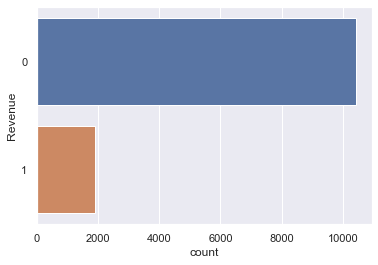

0    10422
1     1908
Name: Revenue, dtype: int64


In [9]:
# Revenue

""" Whether a visit to the website led to a purchase. """

sns.countplot(y = 'Revenue', data = df)
plt.show()
print(df.Revenue.value_counts())

This graph illustrates the total of visits that led to no transaction and to a transaction. As you can see, 10422 of the visits to the websistes did not result in a purchase and 1908 of the vistis result in a purchase. 

In [10]:
# Conversion rate
print("The conversion rate is:", 1908/ 12330 * 100)

The conversion rate is: 15.474452554744525


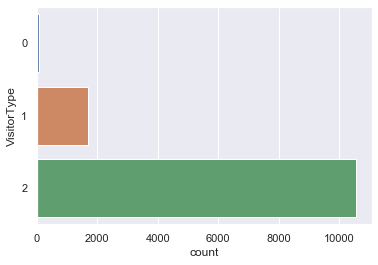

2    10551
1     1694
0       85
Name: VisitorType, dtype: int64


In [11]:
# Visitor type

""" The type of visitor to the website, which could be a new visitor, a returning visitor, or others."""

sns.countplot(y = 'VisitorType', data = df)
plt.show()
print(df.VisitorType.value_counts())

This graph illustrates that 10511 of the visitors are returning visitors and 1694 visitors are new visitors. This shows that there are more returning visitors than new visitors.

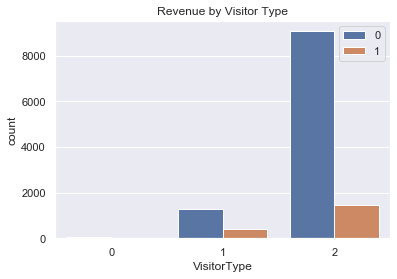

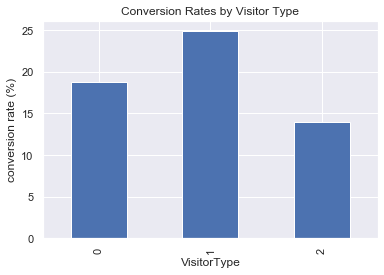

In [12]:
# Revenue versus visitor type
sns.countplot(x='VisitorType', hue='Revenue', data=df).set_title('Revenue by Visitor Type')
plt.legend()
plt.show()

# Conversion Rate by visitor type
conversion_rate_by_VisitorType = df.groupby(by='VisitorType')['Revenue'].sum() / df.groupby(by='VisitorType')['Revenue'].count() * 100.0
ax = conversion_rate_by_VisitorType.loc[[0, 1, 2]].plot(
    kind='bar',
    grid=True,
    title='Conversion Rates by Visitor Type')
ax.set_xlabel('VisitorType')
ax.set_ylabel('conversion rate (%)')
plt.show()

###Source of the code: Hwang, Y. (2019). Hands-On Data Science for Marketing: Improve your marketing strategies with 
###machine learning using Python and R. Packt Publishing Ltd.

This graph illustraties that returning customers make the most purchases.

This graph illustrates that despite that fact that the majority of visitors are returning visitors, the conversion rate is higher for the new visitors. 

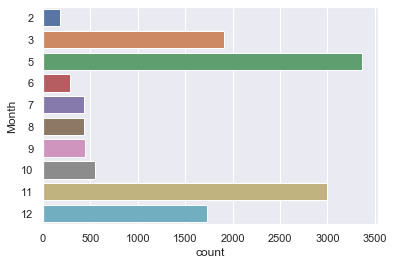

5     3364
11    2998
3     1907
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: Month, dtype: int64


In [13]:
# Month

""" The month in which the visit occurred. """

sns.countplot(y = 'Month', data = df)
plt.show()
print(df.Month.value_counts())

This graph illustrates that the month May has the highest number of visits. 

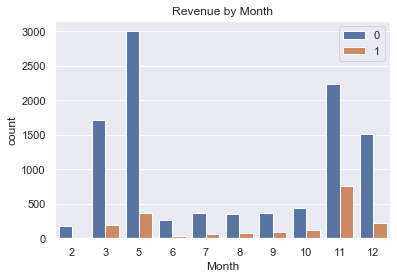

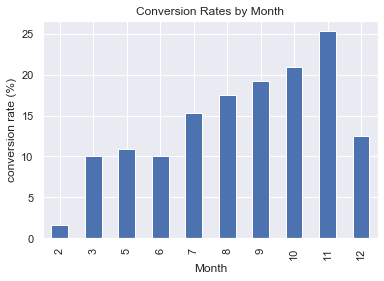

In [14]:
# Revenue versus month
sns.countplot(x='Month', hue='Revenue', data=df).set_title('Revenue by Month')
plt.legend()
plt.show()

# Conversion Rate by month
conversion_rate_by_Month = df.groupby(by='Month')['Revenue'].sum() / df.groupby(by='Month')['Revenue'].count() * 100.0
ax = conversion_rate_by_Month.loc[[2, 3, 5, 6, 7, 8, 9, 10, 11, 12]].plot(
    kind='bar',
    grid=True,
    title='Conversion Rates by Month')
ax.set_xlabel('Month')
ax.set_ylabel('conversion rate (%)')
plt.show()

This graph illustrates that the month November has the highest number of transactions. 

This graph illustrates that despite the fact that the month of May has the most visits, the month of November has the highest conversion rate. 

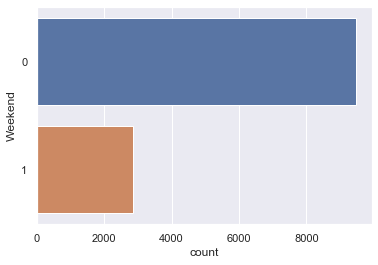

0    9462
1    2868
Name: Weekend, dtype: int64


In [15]:
# Weekend

""" Whether or not the day is in the weekend. """

sns.countplot(y = 'Weekend', data = df)
plt.show()
print(df.Weekend.value_counts())

This graph illustrates that weekend visitors to the website are less active than weekday visitors.

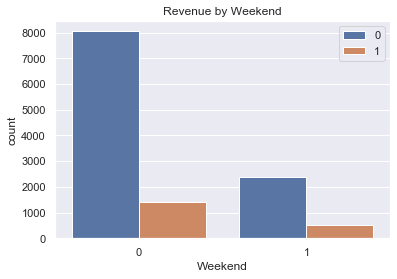

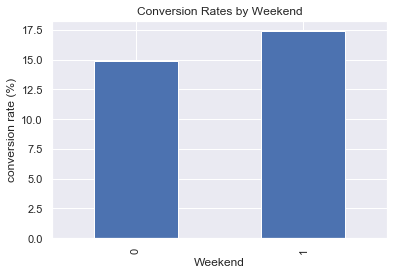

In [16]:
# Revenue versus weekend
sns.countplot(x='Weekend', hue='Revenue', data=df).set_title('Revenue by Weekend')
plt.legend()
plt.show()

# Conversion Rate by weekend
conversion_rate_by_Weekend = df.groupby(by='Weekend')['Revenue'].sum() / df.groupby(by='Weekend')['Revenue'].count() * 100.0
ax = conversion_rate_by_Weekend.plot(
    kind='bar',
    grid=True,
    title='Conversion Rates by Weekend')
ax.set_xlabel('Weekend')
ax.set_ylabel('conversion rate (%)')
plt.show()

This graph illustrates that the weekdays have the highest revenue. 

This graph illustrates that despite the fact that the visitors are less active in the weekends, the weekends have the highest conversion rate.

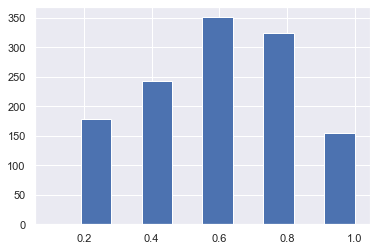

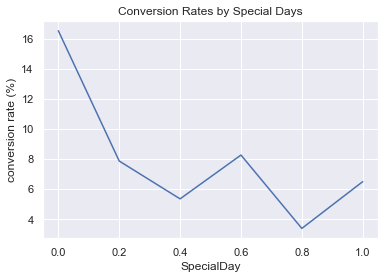

In [17]:
# SpecialDay

""" The closeness of the site visiting time to a specific special day. """

plt.hist(df['SpecialDay'], bins = 10, range = (0.1, 1.0))
plt.show()
conversion_rate_by_SpecialDay = df.groupby(by='SpecialDay')['Revenue'].sum() / df.groupby(by='SpecialDay')['Revenue'].count() * 100.0
ax = conversion_rate_by_SpecialDay.plot(
    grid=True,
    title='Conversion Rates by Special Days')
ax.set_xlabel('SpecialDay')
ax.set_ylabel('conversion rate (%)')
plt.show()

This graph illustrates that the majority of visitors occur two of three days before a special day. 

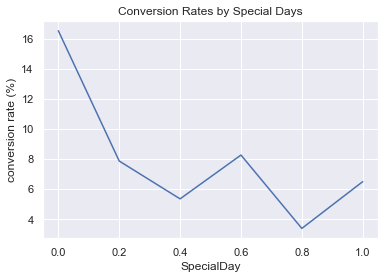

In [18]:
# Conversion Rate by SpecialDay
conversion_rate_by_SpecialDay = df.groupby(by='SpecialDay')['Revenue'].sum() / df.groupby(by='SpecialDay')['Revenue'].count() * 100.0
ax = conversion_rate_by_SpecialDay.plot(
    grid=True,
    title='Conversion Rates by Special Days')
ax.set_xlabel('SpecialDay')
ax.set_ylabel('conversion rate (%)')
plt.show()

This graph illustrates that conversion rate for special day is 0.6, which means that the majority of transactions occur two or three days before a special day. 

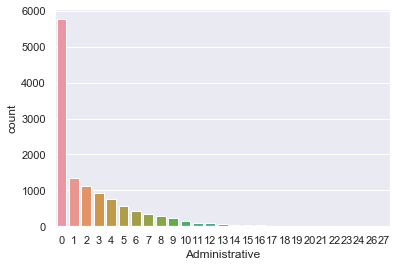

0     0.467802
1     0.109813
2     0.090349
3     0.074209
4     0.062044
5     0.046634
6     0.035036
7     0.027413
8     0.023277
9     0.018248
10    0.012409
11    0.008516
12    0.006975
13    0.004542
14    0.003569
15    0.003082
16    0.001946
17    0.001298
18    0.000973
19    0.000487
24    0.000324
22    0.000324
23    0.000243
20    0.000162
21    0.000162
26    0.000081
27    0.000081
Name: Administrative, dtype: float64


In [19]:
# Administrative 

""" The visits of webpages related to account management such as a profile page. """

sns.countplot(df['Administrative'])
plt.show()
print(df['Administrative'].value_counts(normalize=True))

This graph illustrates that 47% of the visitors are not visiting webpages related to account management such as the profile page of the website. 

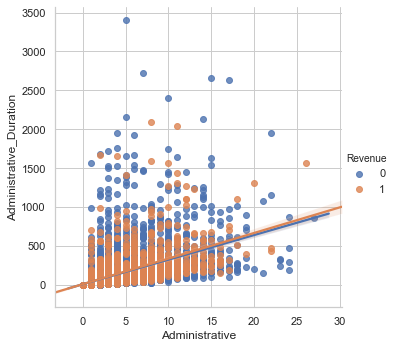

In [20]:
# Administrative and administrative duration on revenue

sns.set(style="whitegrid")

ax = sns.lmplot(x="Administrative", y="Administrative_Duration",\

                hue='Revenue', data=df)



This graph illustrates that administrative and administrative duration are positive correlated.

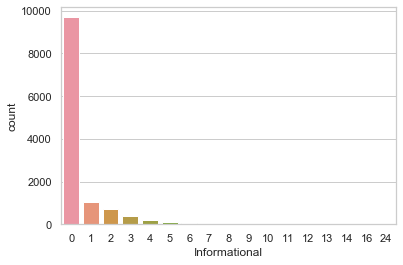

0     0.786618
1     0.084428
2     0.059043
3     0.030819
4     0.018005
5     0.008029
6     0.006326
7     0.002920
9     0.001217
8     0.001135
10    0.000568
12    0.000406
14    0.000162
11    0.000081
13    0.000081
24    0.000081
16    0.000081
Name: Informational, dtype: float64


In [21]:
# Informational

""" The visits of webpages related to information about the website such as their address or contact information. """

sns.countplot(df['Informational'])
plt.show()
print(df['Informational'].value_counts(normalize=True))

This graph illustrates that the majority of visitors are not visiting webpages related to the information about the website. 

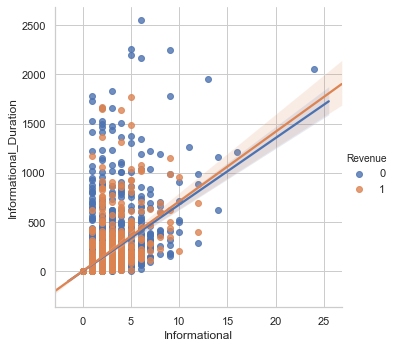

In [22]:
# Informational and informational duration on revenue 
sns.set(style="whitegrid")

ax = sns.lmplot(x="Informational", y="Informational_Duration",\

                hue='Revenue', data=df)

This graph illustrates that informational and informational duration are positive correlated. 

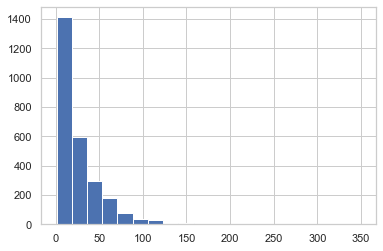

In [23]:
# PageValues

""" The average value for a web page that a user visited before completing an e-commerce transaction. """


plt.hist(df['PageValues'], bins = 20, range = (1, 350))
plt.show()

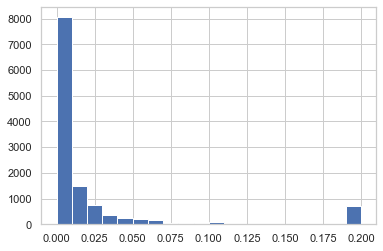

In [24]:
# BounceRates

""" Percentage of visitors who enter the site from that page and then leave."""

plt.hist(df['BounceRates'], bins = 20)
plt.show()


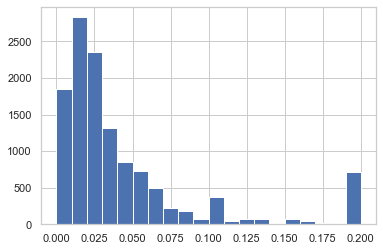

In [25]:
# ExitRates

""" The proportion of pages that were broken out of the total number of times the page was seen. """

plt.hist(df['ExitRates'], bins = 20)
plt.show()


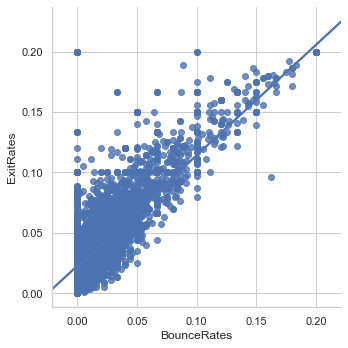

In [26]:
# Bounce rates versus exit rates
sns.set(style="whitegrid")

ax = sns.lmplot(x="BounceRates", y="ExitRates", data=df)

This graph illustrates that Bounce Rates and Exit Rates are positive correlated. 

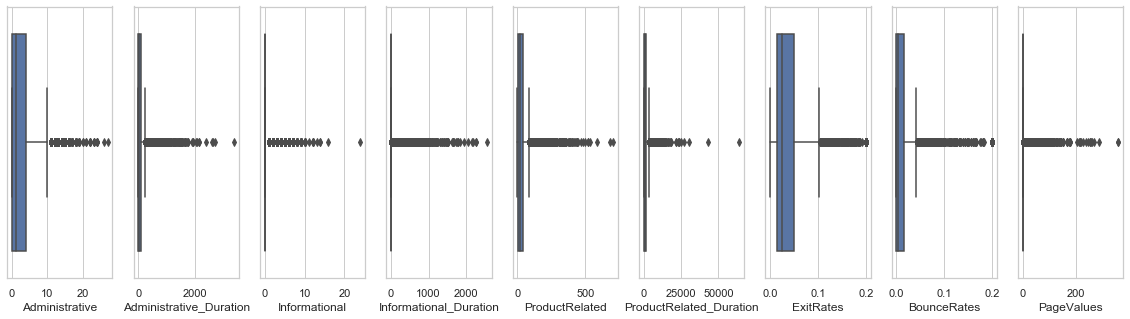

In [27]:
#Outliers
fig, axes = plt.subplots(1, 9, figsize=(20, 5), sharey=True)

# Administrative
sns.boxplot(ax=axes[0], x=df['Administrative'])

# Administrative Duration
sns.boxplot(ax=axes[1], x=df['Administrative_Duration'])

# Informational
sns.boxplot(ax=axes[2], x=df['Informational'])

# Informational Duration
sns.boxplot(ax=axes[3], x=df['Informational_Duration'])

# Product related
sns.boxplot(ax=axes[4], x=df['ProductRelated'])

# Product related Duration
sns.boxplot(ax=axes[5], x=df['ProductRelated_Duration'])

# ExitRates
sns.boxplot(ax=axes[6], x=df['ExitRates'])

# BounceRates
sns.boxplot(ax=axes[7], x=df['BounceRates'])

# Page values
sns.boxplot(ax=axes[8], x=df['PageValues'])


            







The outliers of the dataset were not removed since these outliers are realistic outliers that represent for example the few visitors who have visited the administrative pages and informational pages of the website 